## Main Mega Project File
Pada file ini, kita akan melakukan beberapa hal terhadap data yang sudah kita scrapping. Data yang akan digunakan adalah data dari twit sebanyak 20000 dari twitter menggunakan api twint. 20000 baris data tersebut merupakan data dengan kandungan kata "muslim" dan merupakan 20000 twit terakhir.

### Data Cleaning
Pada bagian ini data akan dibersihkan sesuai kebutuhan projek.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [17]:
def drop_columns(df):
    base_col = [
        'created_at', 
        'date', 
        'time', 
        'username', 
        'tweet', 
        'language', 
        'replies_count', 
        'retweets_count',
        'likes_count',
        'hashtags',     
    ]
    drop_col = diff(df.columns, base_col)
    df_drop = df.drop(drop_col, axis = 1)
    return df_drop

In [3]:
def diff(list1, list2):
    c = set(list1).union(set(list2))  # or c = set(list1) | set(list2)
    d = set(list1).intersection(set(list2))  # or d = set(list1) & set(list2)
    return list(c - d)

In [4]:
def en_only(df):
    df_en = df[df['language'] == 'en']
    return df_en

In [5]:
def created_at_split(df):
    df_splitted = df.copy()
    df_splitted['region'] = df_splitted['created_at'].apply(lambda x : x.split()[2])
    return df_splitted

In [6]:
def pipeline(df):
    df = drop_columns(df)
    df = en_only(df)    
    df = created_at_split(df)
    return df

In [62]:
def highest_tweet(df_copy, col, limit):
    df_copy_replies_sum = pd.DataFrame(df_copy.groupby('username')[col].sum()).sort_values(by = [col], ascending = False)

    highest_tweet_replies = df_copy_replies_sum[:limit]

    sns.barplot(data = highest_tweet_replies, y = highest_tweet_replies.index, x = col, orient = 'h')

In [7]:
cwd = os.getcwd()
data_path = os.path.join(cwd, 'databases', 'store_twit_muslim.csv')

df = pd.read_csv(data_path)
df_copy = df.copy()

df_copy.head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16168\3084570000.py:4: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1.620000e+18,1.620000e+18,2023-02-10 19:59:36 SE Asia Standard Time,2/10/2023,19:59:36,700,1.400000e+18,bmidou124,SriVaishnava Alucard (परकालरामानुजदासन),NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1.620000e+18,1.620000e+18,2023-02-10 19:59:34 SE Asia Standard Time,2/10/2023,19:59:34,700,6.535429e+07,khasbaat,arijit ghosh,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1.620000e+18,1.620000e+18,2023-02-10 19:59:33 SE Asia Standard Time,2/10/2023,19:59:33,700,1.060000e+18,vasudaiva,Vasudaiva_Kutumbakam 🕉️🛕🪷🐅,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'zafshee2', 'name': 'SheenA Z...",NaN,NaN,NaN,NaN
3,1.620000e+18,1.620000e+18,2023-02-10 19:59:30 SE Asia Standard Time,2/10/2023,19:59:30,700,8.590000e+17,mr_muslim511,Slim,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1.620000e+18,1.620000e+18,2023-02-10 19:59:29 SE Asia Standard Time,2/10/2023,19:59:29,700,1.620000e+18,rajeshc40075742,Rajesh ch,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'bandisanjay_bjp', 'name': 'B...",NaN,NaN,NaN,NaN


In [8]:
df_copy.shape

(20004, 36)

In [9]:
df_copy.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [10]:
df['language'].unique()

array(['en', 'et', 'in', 'ar', 'fr', 'tl', 'hi', 'sv', 'und', 'ps', 'ur',
       'kn', 'zxx', 'ro', 'cy', 'tr', 'qme', 'ja', 'de', 'ca', 'am', 'bn',
       'es', 'ht', 'ta', 'qam', 'da', 'fa', 'no', 'qht', 'pl', 'nl', 'pt',
       'gu', 'it', 'fi', 'art', 'te', 'qst', 'sl', 'is', 'mr', 'si', 'zh',
       'lv', 'ckb', 'cs', 'eu', 'lt', 'th'], dtype=object)

In [11]:
df[df.duplicated()]

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest


<AxesSubplot: xlabel='count', ylabel='language'>

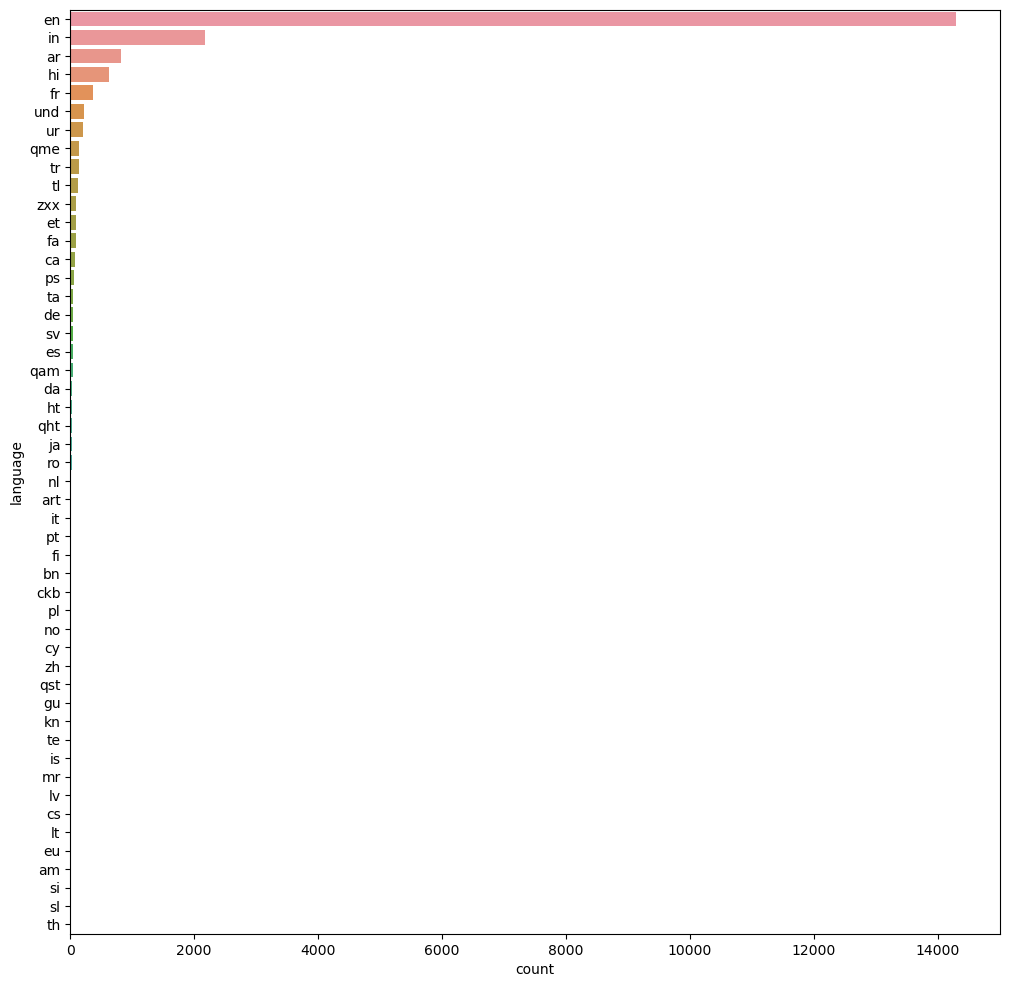

In [12]:
fig, ax = plt.subplots(1,1, figsize = (12,12))

sns.countplot(data = df, y = 'language', ax = ax, order = df['language'].value_counts().index)

Berdasarkan plot tersebut, kita mungkin hanya memerlukan bahasa en saja mengingat mungkin bahasa tersebut yang mungkin dapat dibaca. Selain itu, kedua bahasa tersebut menunjukkan banyak jumlah yang timpang dengan yang lain

In [18]:
df_copy = pipeline(df_copy)

In [21]:
print('kolom : {}'.format(df_copy.columns))

kolom : Index(['created_at', 'date', 'time', 'username', 'tweet', 'language',
       'replies_count', 'retweets_count', 'likes_count', 'hashtags', 'region'],
      dtype='object')


In [23]:
df_copy.region.unique()

array(['SE'], dtype=object)

Berdasarkan informasi di atas, kita dapat mengetahui bahwa data tweet yang kita gunakan hanya terdiri dari user yang ada di southeast

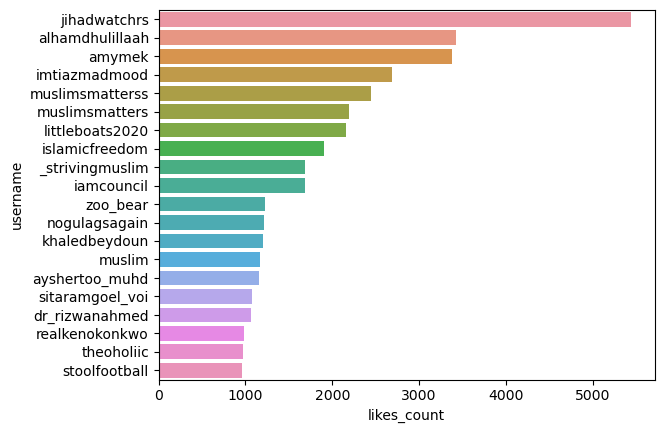

In [64]:
highest_tweet(df_copy, 'replies_count', 20)


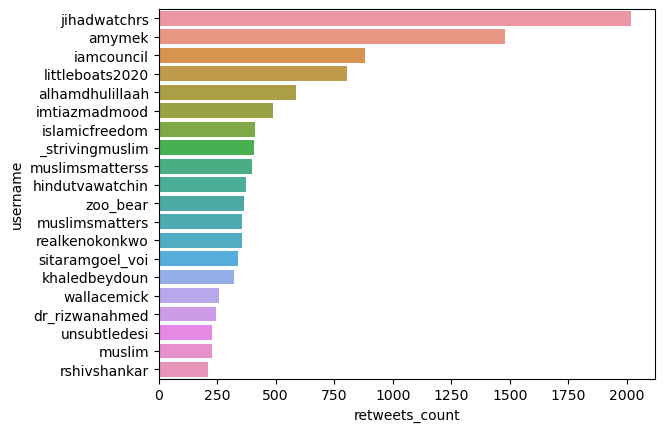

In [65]:
highest_tweet(df_copy, 'retweets_count', 20)


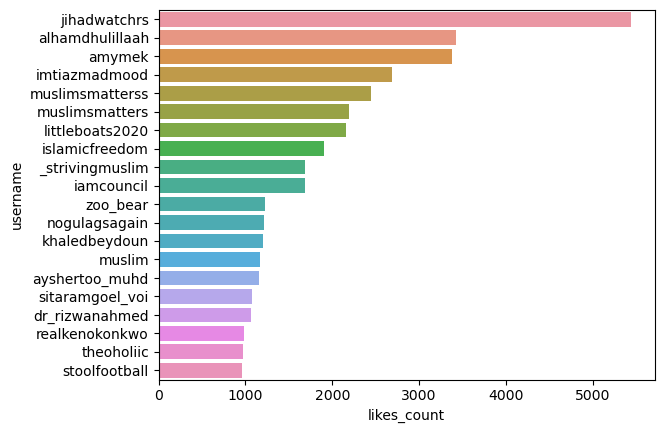

In [66]:
highest_tweet(df_copy, 'likes_count', 20)


In [ ]:
df_copy.sort_values